<a href="https://www.kaggle.com/code/mohammedmohsen0404/proj8-abalone-dataset?scriptVersionId=191047320" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

---
**<center><h1>Regression with an Abalone Dataset</h1></center>**
<center><h3>Learning ML, DL through 100 Practical Projects</h3></center>

---

#**Import Libraries and Data**
---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm , skew
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
import xgboost as XGB

In [ ]:
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c playground-series-s4e4


mkdir: cannot create directory ‘/root/.kaggle’: File exists

playground-series-s4e4.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip playground-series-s4e4.zip

Archive:  playground-series-s4e4.zip

replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n

replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n

replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
df_train = pd.read_csv('train.csv').copy()
df_test = pd.read_csv('test.csv').copy()

# **Take a look at the data**
---

In [ ]:
df_train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 90615 entries, 0 to 90614

Data columns (total 10 columns):

 #   Column          Non-Null Count  Dtype  

---  ------          --------------  -----  

 0   id              90615 non-null  int64  

 1   Sex             90615 non-null  object 

 2   Length          90615 non-null  float64

 3   Diameter        90615 non-null  float64

 4   Height          90615 non-null  float64

 5   Whole weight    90615 non-null  float64

 6   Whole weight.1  90615 non-null  float64

 7   Whole weight.2  90615 non-null  float64

 8   Shell weight    90615 non-null  float64

 9   Rings           90615 non-null  int64  

dtypes: float64(7), int64(2), object(1)

memory usage: 6.9+ MB


In [ ]:
df_train.describe()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,45307.000000,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,26158.441658,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,22653.500000,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,45307.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,67960.500000,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,90614.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
df_train.select_dtypes(include='object').value_counts()

,count
Sex,
I,33093
M,31027
F,26495


In [ ]:
df_train['Rings'].describe()

,Rings
count,90615.000000
mean,9.696794
std,3.176221
min,1.000000
25%,8.000000
50%,9.000000
75%,11.000000
max,29.000000


# **Exploratory Data Analysis**
---

**Univariate Analysis**

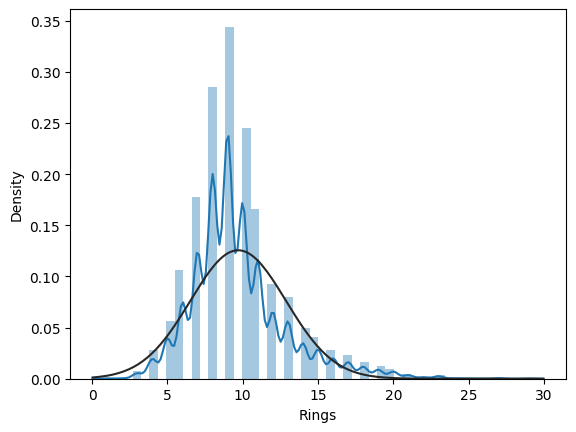

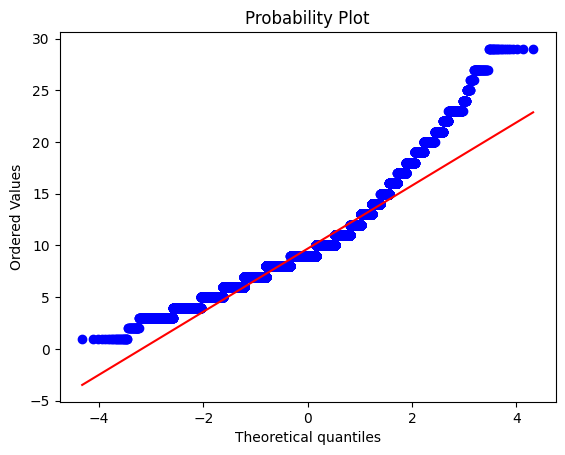

In [ ]:
sns.distplot(df_train['Rings'],fit = stats.norm)
plt.show()
stats.probplot(df_train['Rings'],plot = plt)
plt.show()

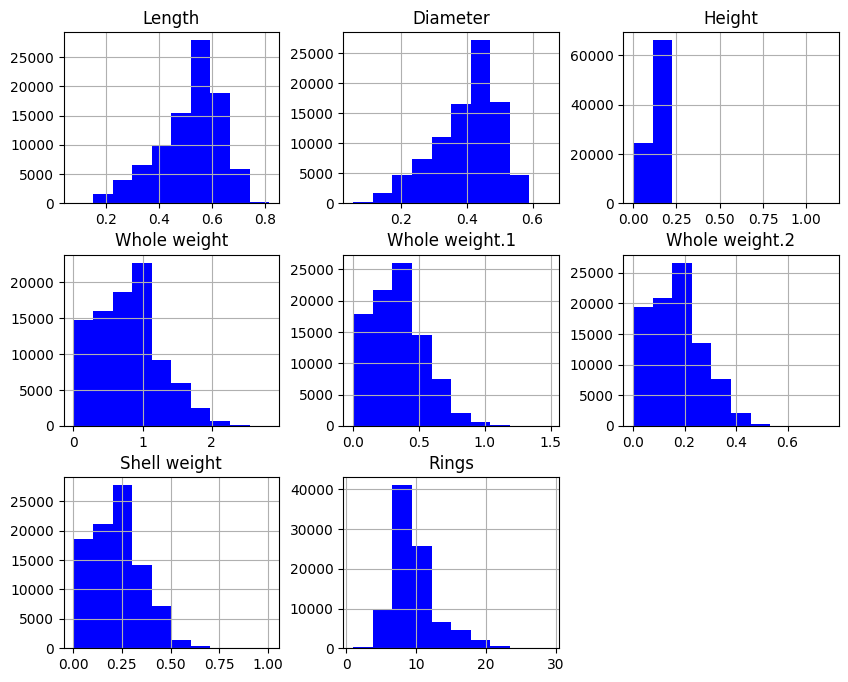

In [ ]:
num = df_train.drop(['Sex','id'],axis = 1)
num.hist(figsize=(10,8),color = 'b',)
plt.show()

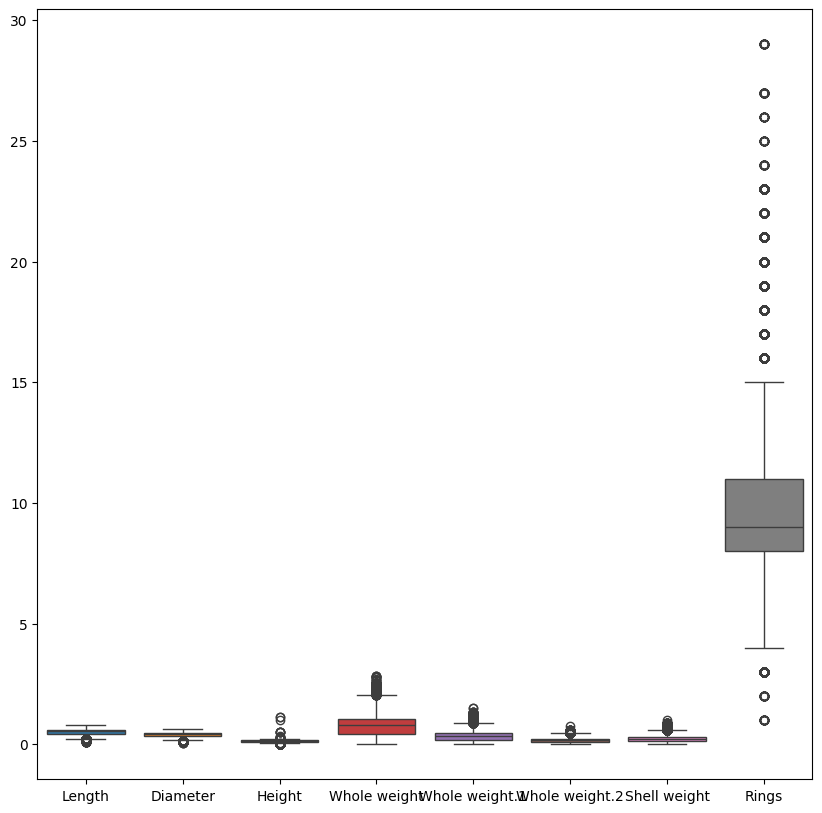

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(num)
plt.show()

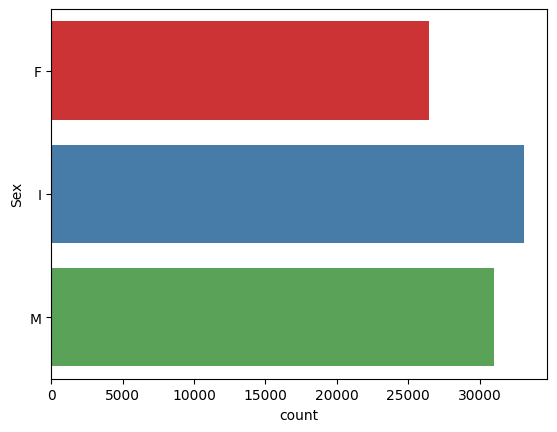

In [ ]:
sns.countplot(df_train['Sex'],palette="Set1")
plt.show()

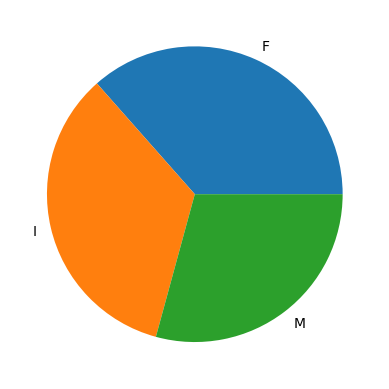

In [ ]:
plt.pie(df_train['Sex'].value_counts(),labels=df_train['Sex'].unique())
plt.show()

**Multivariate Analysis**

<Axes: >

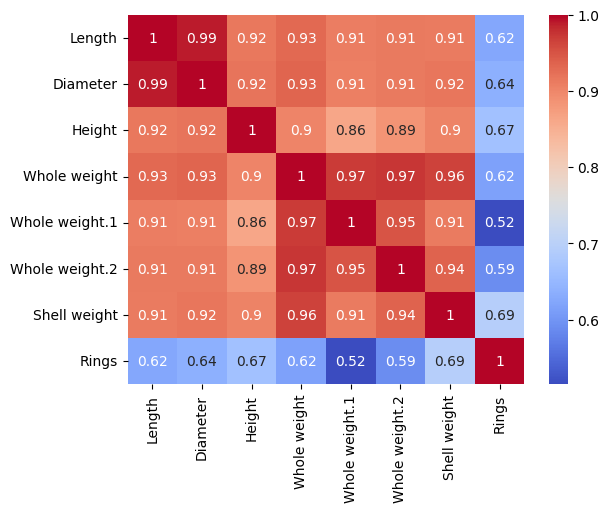

In [ ]:
sns.heatmap(num.corr(),cmap = 'coolwarm',annot=True)

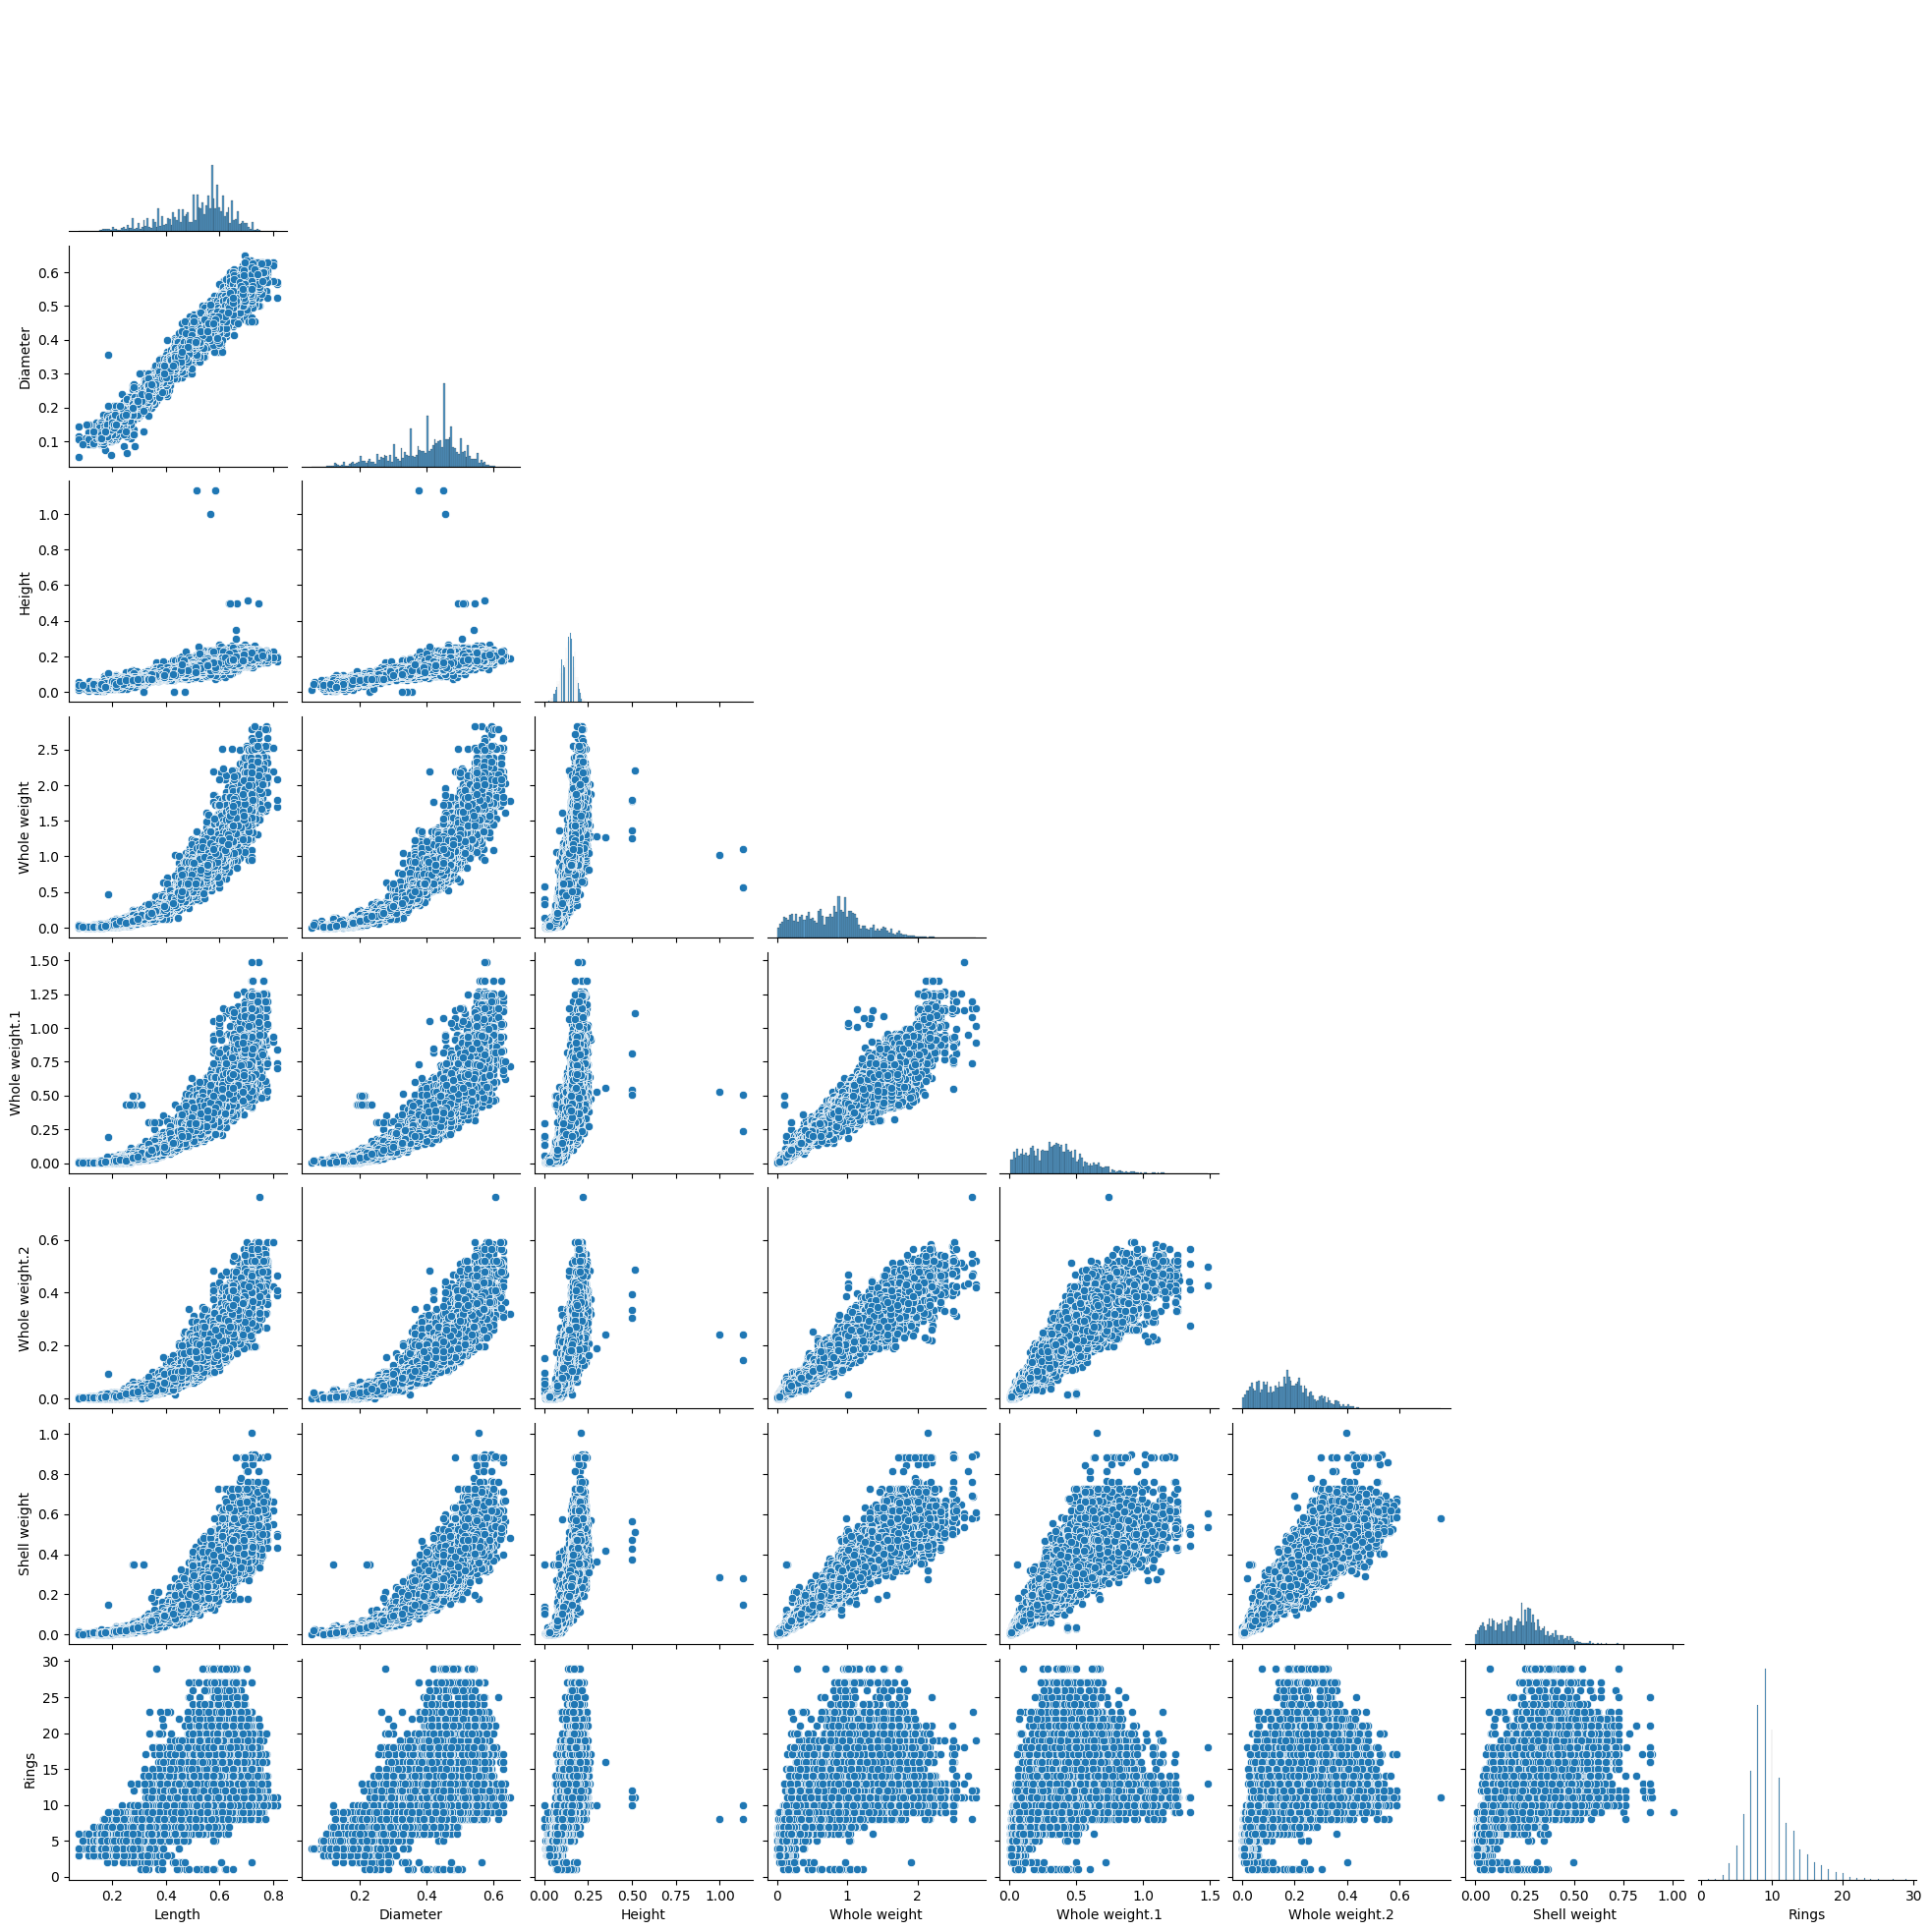

In [ ]:
sns.pairplot(num , corner=True)
plt.show()

# **Data Cleaning**
---

In [ ]:
df_train.drop('id',axis =1,inplace=True)
df_test.drop('id',axis =1,inplace=True)

**Handling Duplicate Rows**

In [ ]:
duplicate_rows = df_train.duplicated()
print(f"Number of duplicate rows in train data : {duplicate_rows.sum()}")

Number of duplicate rows in train data : 0


In [ ]:
duplicate_rows = df_test.duplicated()
print(f"Number of duplicate rows in test data : {duplicate_rows.sum()}")

Number of duplicate rows in test data : 0


**Handling Missing Data**

In [ ]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Sex,0,0.0
Length,0,0.0
Diameter,0,0.0
Height,0,0.0
Whole weight,0,0.0
Whole weight.1,0,0.0
Whole weight.2,0,0.0
Shell weight,0,0.0
Rings,0,0.0


In [ ]:
total = df_train.isnull().sum().sum()
print('Total Null values in train data =' ,total)

Total Null values in train data = 0


In [ ]:
total = df_test.isnull().sum().sum()
print('Total Null values in test data =' ,total)

Total Null values in test data = 0


# **Data Preprocessing**
---

**Skewness Handling**



In [ ]:
df_train["Rings"] = np.log1p(df_train["Rings"])

**Encoding Categorical Variables**

In [ ]:
df_train = pd.get_dummies(df_train,columns=['Sex'] ,prefix='Sex')
df_test = pd.get_dummies(df_test,columns=['Sex'] ,prefix='Sex')

**Data splitting**

In [ ]:
X = df_train.drop('Rings',axis=1)
y = df_train['Rings']

In [ ]:
X_train,X_val,y_train ,y_val= train_test_split(X,y,random_state=101,shuffle=True,test_size=.1)
X_test = df_test

**Dealing with Outliers**

In [ ]:
# Select only numerical columns before calculating quantiles
numeric_df = df_train.select_dtypes(include=['number'])

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Use the numerical DataFrame for outlier detection
outliers = numeric_df[((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Outliers using IQR method:")
print(outliers.count())

Outliers using IQR method:

Length            6571

Diameter          6571

Height            6571

Whole weight      6571

Whole weight.1    6571

Whole weight.2    6571

Shell weight      6571

Rings             6571

dtype: int64


In [ ]:
df_train.drop(outliers.index,inplace=True)

**Data Normalization**

In [ ]:
Scalar = StandardScaler()
X_train = Scalar.fit_transform(X_train)
X_val = Scalar.transform(X_val)
X_test = Scalar.transform(X_test)

# **Modeling**

In [ ]:
regressors = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge(random_state=42)),
    ('Decision Tree Regressor', DecisionTreeRegressor(random_state=42,max_depth=8)),
    ('Random Forest Regressor', RandomForestRegressor(random_state=42,max_depth=7)),
    ('Gradient Boosting Regressor', GradientBoostingRegressor(random_state=42,max_depth=7)),
    ('XGBRegressor',XGB.XGBRegressor(random_state=42,max_depth=7))
]

In [ ]:
for name, model in regressors:
    print(f"{name}")
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_val)

    print('Training Data Evaluation:')
    print(f'  R2 Score: {r2_score(y_train, y_pred_train):.4f}')
    print(f'  MSE: {mean_squared_error(y_train, y_pred_train):.4f}')
    print(f'  MAE: {mean_absolute_error(y_train, y_pred_train):.4f}')
    print('---------------')
    print('Validation Data Evaluation:')
    print(f'  R2 Score: {r2_score(y_val, y_pred_test):.4f}')
    print(f'  MSE: {mean_squared_error(y_val, y_pred_test):.4f}')
    print(f'  MAE: {mean_absolute_error(y_val, y_pred_test):.4f}')
    print('====================================\n')


Linear Regression

Training Data Evaluation:

  R2 Score: 0.6674

  MSE: 0.0272

  MAE: 0.1214

---------------

Validation Data Evaluation:

  R2 Score: 0.6760

  MSE: 0.0260

  MAE: 0.1208




Ridge Regression

Training Data Evaluation:

  R2 Score: 0.6674

  MSE: 0.0272

  MAE: 0.1214

---------------

Validation Data Evaluation:

  R2 Score: 0.6760

  MSE: 0.0260

  MAE: 0.1208




Decision Tree Regressor

Training Data Evaluation:

  R2 Score: 0.7180

  MSE: 0.0230

  MAE: 0.1112

---------------

Validation Data Evaluation:

  R2 Score: 0.6966

  MSE: 0.0243

  MAE: 0.1152




Random Forest Regressor

Training Data Evaluation:

  R2 Score: 0.7162

  MSE: 0.0232

  MAE: 0.1114

---------------

Validation Data Evaluation:

  R2 Score: 0.7058

  MSE: 0.0236

  MAE: 0.1138




Gradient Boosting Regressor

Training Data Evaluation:

  R2 Score: 0.7655

  MSE: 0.0191

  MAE: 0.1019

---------------

Validation Data Evaluation:

  R2 Score: 0.7266

  MSE: 0.0219

  MAE: 0.1096




XGBR

In [ ]:
for name , model in regressor:
  model.fit(X_train,y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_val)
  print(f'{name}:')
  print('R2 Score: ', r2_score(y_val, y_pred))
  print("MSE: ", mean_squared_error(y_val, y_pred))
  print("MAE: ", mean_absolute_error(y_val, y_pred))
  print('------------------------------------')


NameError: name 'regressor' is not defined